# English Text Analysis with Markov Chains

This notebook visualizes the results of the Markov Chain analysis on *Alice's Adventures in Wonderland*.

## Objectives
1. Visualize Entropy Rate vs Model Order (k).
2. Compare entropy of Character-level vs Word-level models.
3. Compare Model Entropy with GZIP compression ratio.
4. Analyze entropy variations across chapters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load metrics
df = pd.read_csv('results/metrics.csv')
df.head()

,level,keep_punct,order,h_model,h_seq,gzip_ratio
0,char,False,0,4.057418,4.057418,0.328255
1,char,False,1,3.226433,3.226433,0.328255
2,char,False,2,2.446010,2.446010,0.328255
3,char,False,3,1.827957,1.827957,0.328255
4,char,False,4,1.415392,1.415392,0.328255


## 1. Entropy Rate vs Model Order (Character Level)

We expect the entropy rate to decrease as the order $k$ increases, reflecting the dependencies in English text.

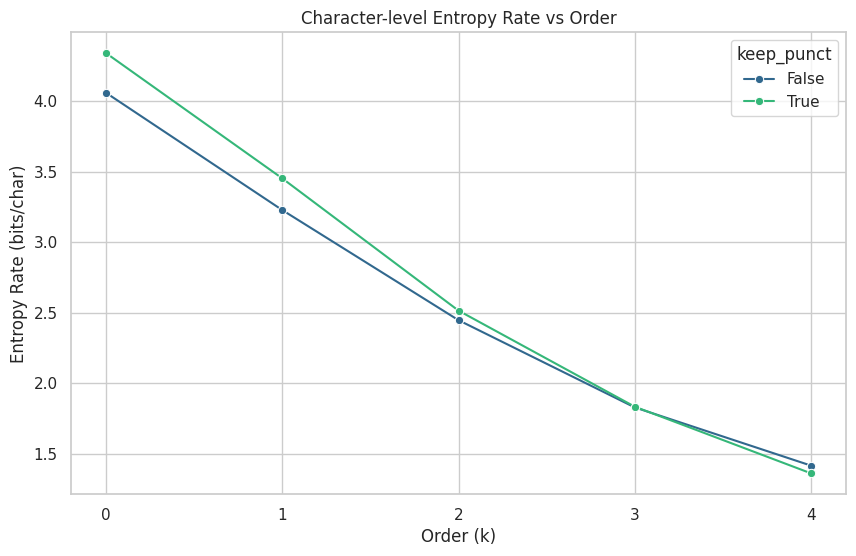

In [3]:
char_df = df[df['level'] == 'char']

plt.figure(figsize=(10, 6))
sns.lineplot(data=char_df, x='order', y='h_model', hue='keep_punct', marker='o', palette='viridis')
plt.title('Character-level Entropy Rate vs Order')
plt.xlabel('Order (k)')
plt.ylabel('Entropy Rate (bits/char)')
plt.xticks(char_df['order'].unique())
plt.grid(True)
plt.savefig('plots/char_entropy_vs_order.png')
plt.show()

## 2. Word Level Entropy

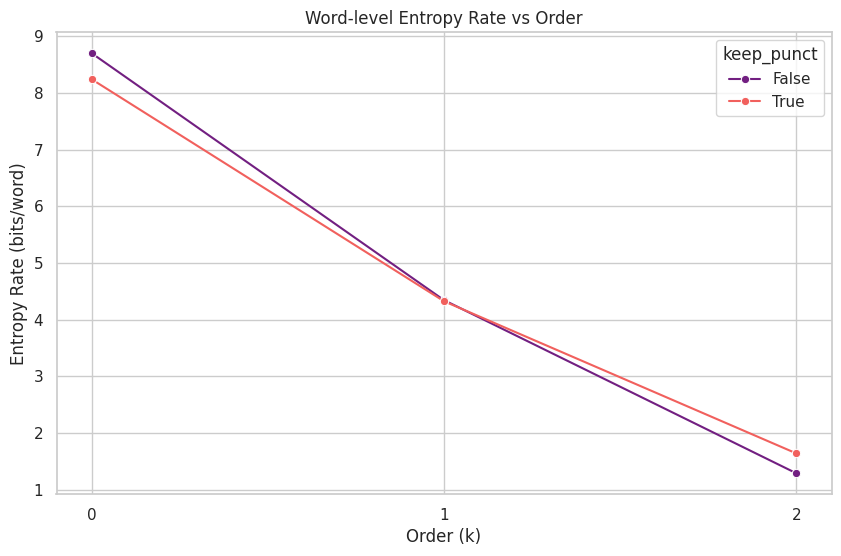

In [4]:
word_df = df[df['level'] == 'word']

plt.figure(figsize=(10, 6))
sns.lineplot(data=word_df, x='order', y='h_model', hue='keep_punct', marker='o', palette='magma')
plt.title('Word-level Entropy Rate vs Order')
plt.xlabel('Order (k)')
plt.ylabel('Entropy Rate (bits/word)')
plt.xticks(word_df['order'].unique())
plt.grid(True)
plt.savefig('plots/word_entropy_vs_order.png')
plt.show()

## 3. Entropy vs GZIP Ratio

We compare the estimated entropy rate (bits/symbol) with the compression ratio achieved by GZIP. Note that GZIP works on bytes, so the comparison is roughly against bits/character. For word models, the units differ significantly.

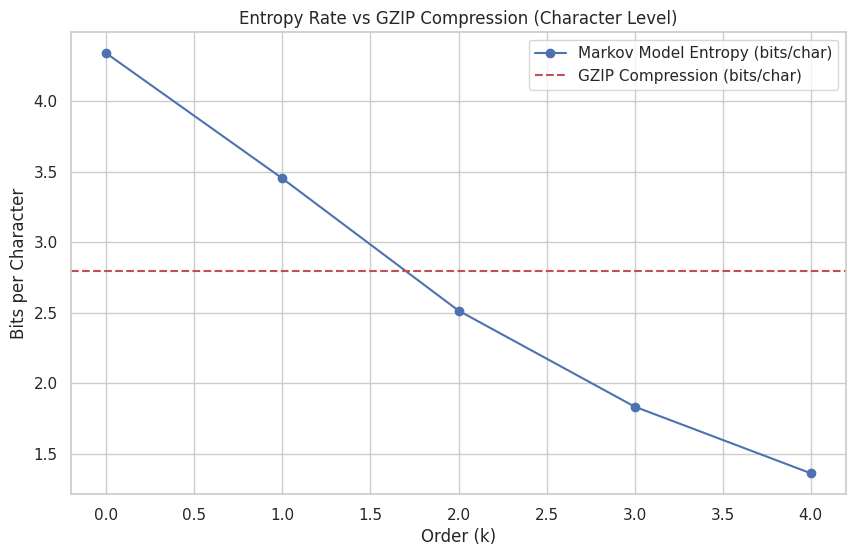

In [5]:
# Filter for Character level, Punctuation=True for best comparison
comp_df = df[(df['level'] == 'char') & (df['keep_punct'] == True)].copy()

# GZIP ratio is compressed_size / original_size. 
# In bits per character, this is roughly ratio * 8 (assuming 1 byte per char input).
comp_df['gzip_bits_per_char'] = comp_df['gzip_ratio'] * 8

plt.figure(figsize=(10, 6))
plt.plot(comp_df['order'], comp_df['h_model'], marker='o', label='Markov Model Entropy (bits/char)')
plt.axhline(y=comp_df['gzip_bits_per_char'].iloc[0], color='r', linestyle='--', label='GZIP Compression (bits/char)')

plt.title('Entropy Rate vs GZIP Compression (Character Level)')
plt.xlabel('Order (k)')
plt.ylabel('Bits per Character')
plt.legend()
plt.grid(True)
plt.savefig('plots/entropy_vs_gzip.png')
plt.show()

## 4. Entropy by Chapter

Analyzing how entropy varies across different chapters of the book.

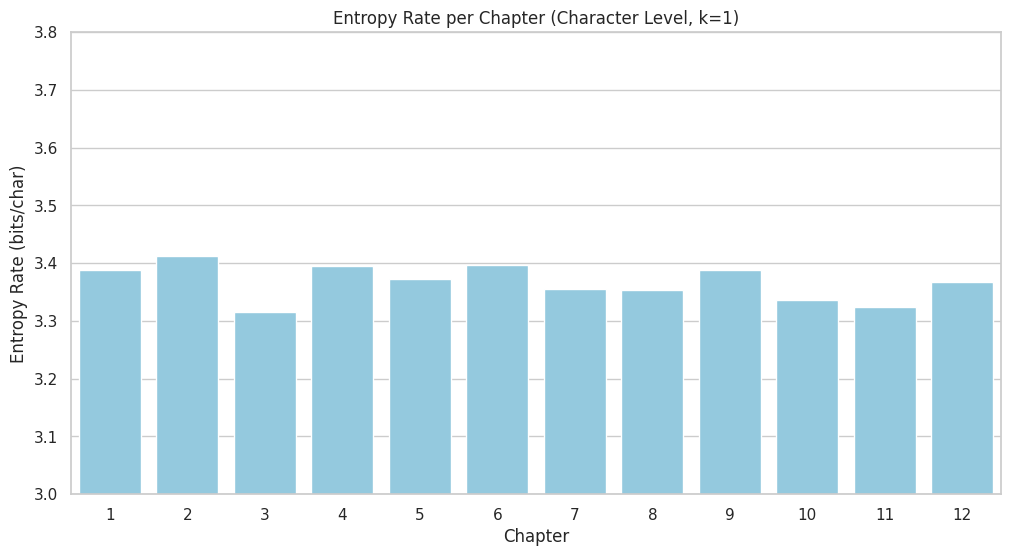

In [6]:
df_chap = pd.read_csv('results/chapter_entropy.csv')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_chap, x='chapter', y='entropy', color='skyblue')
plt.title('Entropy Rate per Chapter (Character Level, k=1)')
plt.xlabel('Chapter')
plt.ylabel('Entropy Rate (bits/char)')
plt.ylim(3.0, 3.8) # Zoom in to see differences if small
plt.savefig('plots/chapter_entropy.png')
plt.show()

## 5. Generated Text Samples

Let's display some of the generated text samples.

In [7]:
with open('results/generated_samples.txt', 'r') as f:
    samples = f.read()

# Print first 1000 chars
print(samples[:2000])

--- Level: char, Punct: False, Order: 0 ---
ut nwshytn htelsoagefci  i  oa l h  oyit lwa u ta o  teetp odnoa aeu hsleetesngd t i n t  att fddo eedusd u  flth ah at oftn lsltney oaao dlous ollero  hnitttn  oit slrkhnota  oohdeetopyaheldua eamevt

--- Level: char, Punct: False, Order: 1 ---
re hro burt ttinge theridyoveale lild lowane t f okerurkethey s asthe an h a paie isllishithem s t sherimm o y te aboidg aichery d t s outhakit ly w lili aga icke sakerser bof serdre bing g mamid amad 

--- Level: char, Punct: False, Order: 2 ---
cromerench the saway come pap oh ming did twon thin alle iso thing aged itstlearmocke that a fam ouldnt ext inkinto al you kno ind as saing waspock seer itileven wound broome says slow satersed even sel

--- Level: char, Punct: False, Order: 3 ---
body ill the the had she were next mark out in it waite old with the fix in a ver eat a down didly in all thater ives the just one timiddle alive had the king turtle game to said as lated it it asleeping

--- Level: